In [3]:
import numpy as np
import pandas as pd

location = 'data/'

train = pd.read_csv(location + "train.csv", parse_dates = ['datetime'])
test =  pd.read_csv(location + "test.csv", parse_dates = ['datetime'])

In [4]:
train["year"]   = train["datetime"].dt.year
train["month"]  = train["datetime"].dt.month
train["day"]    = train["datetime"].dt.day
train["hour"]   = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

test["year"]   = test["datetime"].dt.year
test["month"]  = test["datetime"].dt.month
test["day"]    = test["datetime"].dt.day
test["hour"]   = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second

In [7]:
print(train.shape)
print(test.shape)

(10886, 18)
(6493, 15)


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

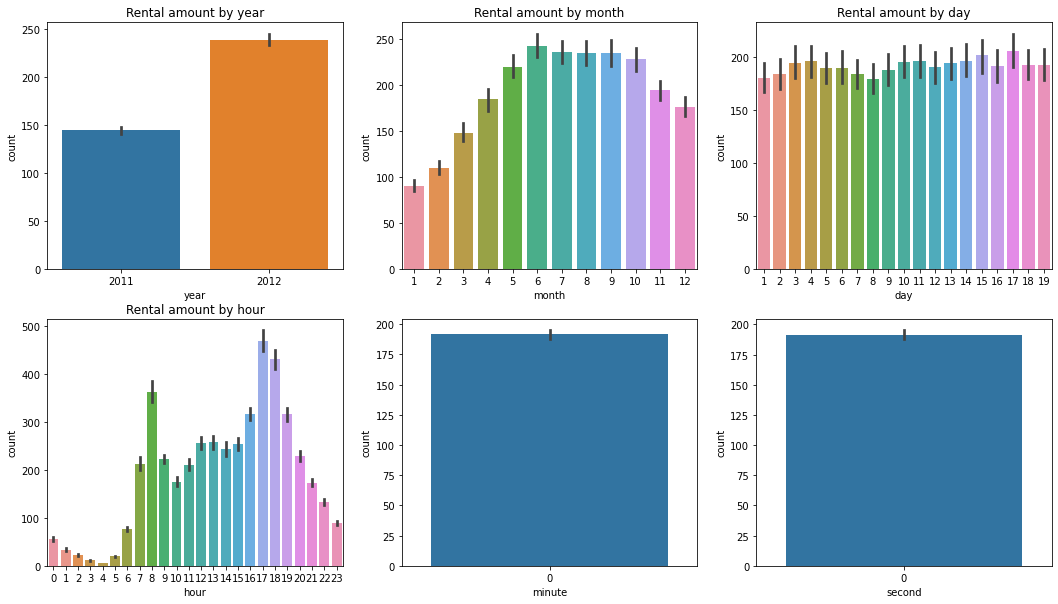

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=train, x = "year", y = "count", ax = ax1)
sns.barplot(data=train, x = "month", y = "count", ax = ax2)
sns.barplot(data=train, x = "day", y = "count", ax = ax3)
sns.barplot(data=train, x = "hour", y = "count", ax = ax4)
sns.barplot(data=train, x = "minute", y = "count", ax = ax5)
sns.barplot(data=train, x = "second", y = "count", ax = ax6)

ax1.set(ylabel = "count", title = "Rental amount by year")
ax2.set(ylabel = "count", title = "Rental amount by month")
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")

과제에서도 이렇게 시간에 대한 분석을 진행해야 한다.

- 코로나 이전, 이후에 대한 시계열 분석 등

In [13]:
train['dayofweek'] = train['datetime'].dt.dayofweek
test['dayofweek'] = test['datetime'].dt.dayofweek
train.shape

#요일 변수 추가

(10886, 19)

In [16]:
train['dayofweek'].value_counts()

#걍 요일별로 순서대로 보이게 하고 싶은데...

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

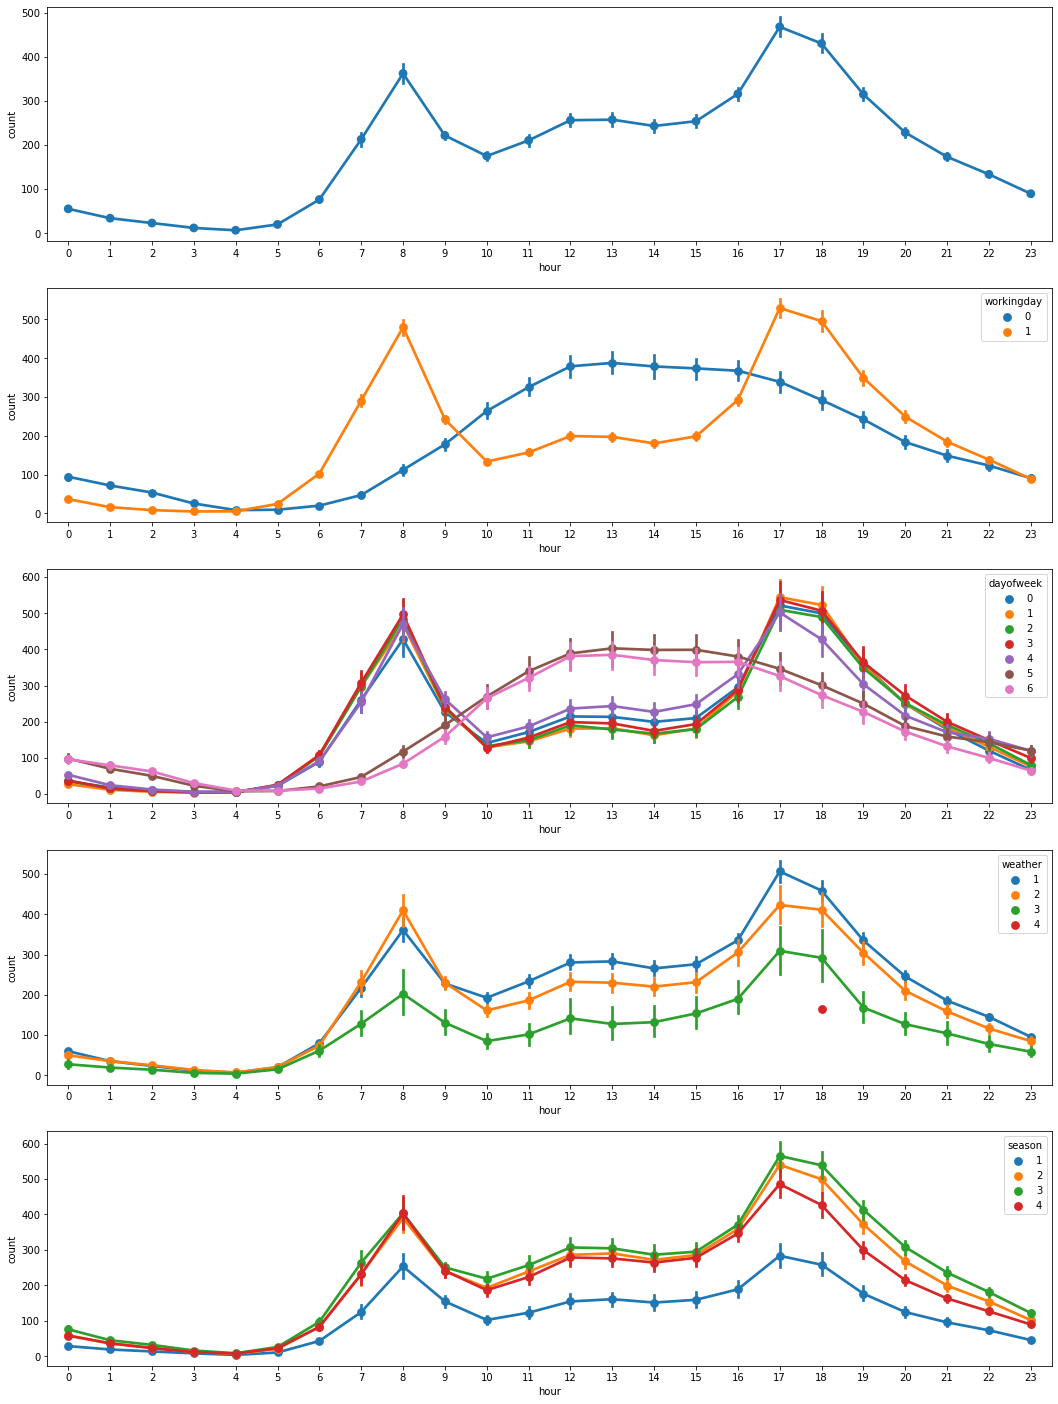

In [17]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

sns.pointplot(data = train, x = "hour", y = "count", ax = ax1)

#만약 카테고리형 데이터가 섞여 있는 경우에는 hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있다.
sns.pointplot(data = train, x = "hour", y = "count", hue = "workingday", ax = ax2)
sns.pointplot(data = train, x = "hour", y = "count", hue = "dayofweek", ax = ax3)
sns.pointplot(data = train, x = "hour", y = "count", hue = "weather", ax = ax4)
sns.pointplot(data = train, x = "hour", y = "count", hue = "season",  ax = ax5)

<AxesSubplot:title={'center':'Correlation of Numeric Features with Rental Count'}>

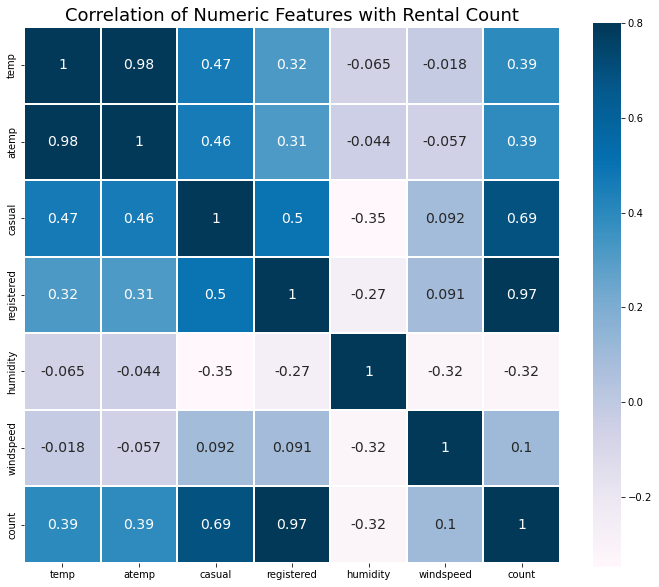

In [18]:
corr_data = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]

colormap = plt.cm.PuBu
 
fig , ax = plt.subplots(figsize = (12,10))

plt.title('Correlation of Numeric Features with Rental Count',y=1,size=18)

sns.heatmap(corr_data.corr(), vmax=.8, linewidths=0.1,square=True,annot=True,cmap=colormap, linecolor="white",annot_kws = {'size':14})

temp와 atemp간 다중공선성이 발생할 수 있음을 확인  

count와 registered간 상관관계가 높음을 확인  

온도, 습도, 풍속은 거의 관계가 없음을 확인  

<AxesSubplot:xlabel='humidity', ylabel='count'>

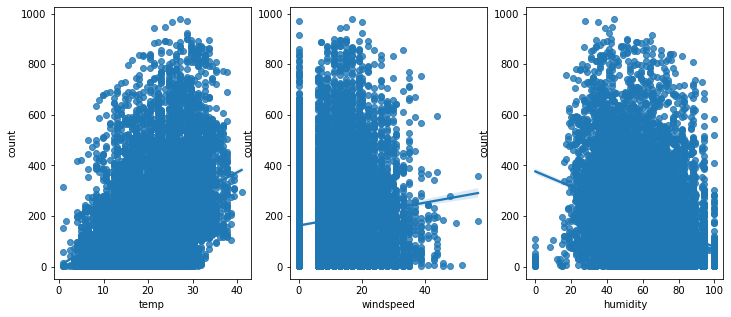

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(12,5))

temp_scatter_plot = pd.concat([train['count'], train['temp']],axis = 1)
sns.regplot(x='temp',y = 'count',data = temp_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

windspeed_scatter_plot = pd.concat([train['count'], train['windspeed']],axis = 1)
sns.regplot(x='windspeed',y = 'count',data = windspeed_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

humidity_scatter_plot = pd.concat([train['count'], train['humidity']],axis = 1)
sns.regplot(x='humidity',y = 'count',data = humidity_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

corr에서 유의하지 않음은 확인했는데... 왜 유의하지 않은지도 검사  

windspeed에 0이 너무 많음을 확인  

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

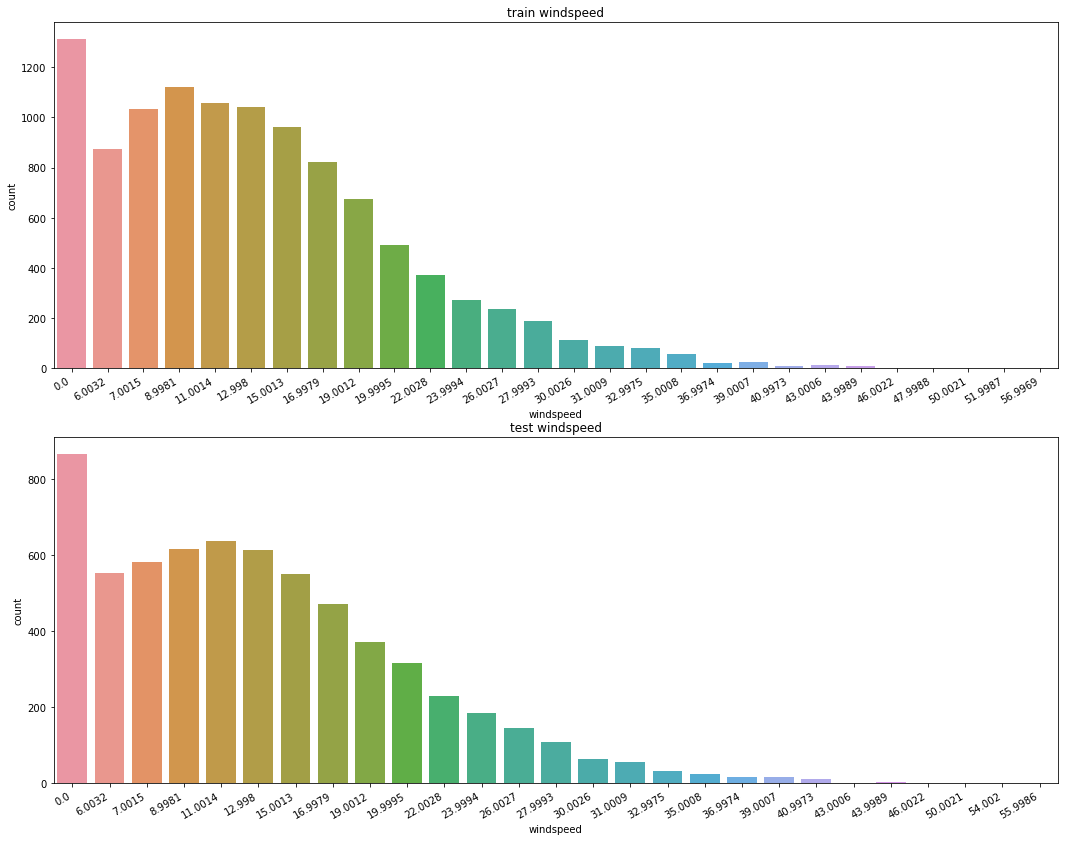

In [20]:
fig, axes = plt.subplots(nrows = 2, figsize = (18,14))

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = "right")
axes[0].set(ylabel = "count", title = "train windspeed")
sns.countplot(data = train, x = "windspeed", ax = axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30, ha = "right")
axes[1].set(ylabel = "count", title = "test windspeed")
sns.countplot(data = test, x = "windspeed", ax = axes[1])

풍속이 0이다??? 이건 좀 이상하다고 판단

In [21]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)
test["year_month"] = test["datetime"].apply(concatenate_year_month) 
    
print(train.shape)
train[["datetime", "year_month"]].head()

#연도별 데이터의 대여 변화를 보기 위해 year와 month를 붙여줌

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

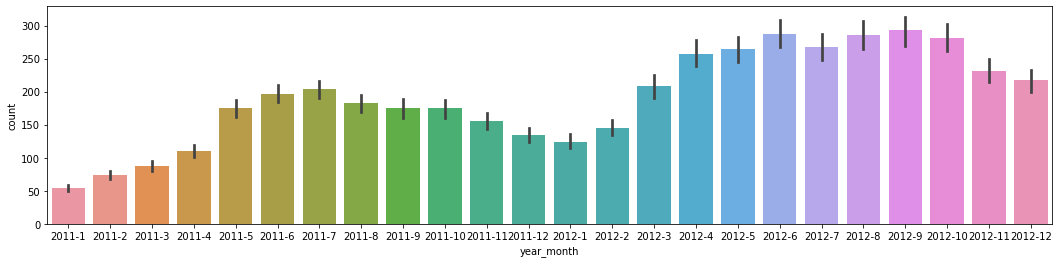

In [22]:
fig, ax = plt.subplots(figsize = (18,4))

sns.barplot(data = train, y = "count", x = "year_month")

In [28]:
from collections import Counter 

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        #print(outlier_list_col)
        outlier_indices.extend(outlier_list_col)
        #print(outlier_indices)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers
        
Outliers_to_drop = detect_outliers(train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [30]:
train.loc[Outliers_to_drop].head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,0,2,2012-3
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,19,18,0,0,0,2012-3
6825,2012-04-02 17:00:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729,2012,4,2,17,0,0,0,2012-4
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012,4,3,17,0,0,1,2012-4
6850,2012-04-03 18:00:00,2,0,1,1,24.60,30.305,26,11.0014,139,661,800,2012,4,3,18,0,0,1,2012-4


In [31]:
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
train.shape

(10846, 20)

In [32]:
#아웃라이어를 죽인 뒤, 첨도와 왜도 확인

train_num = train[["count", "temp", "atemp", "casual", "registered", "humidity", "windspeed"]]

for col in train_num:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(train[col].kurt())  
         )
    
#count는 여전하고, casual과 registered는 수정할 필요가 있어보인다

count           Skewness: 01.21     Kurtosis: 001.20
temp            Skewness: 00.01     Kurtosis: -00.91
atemp           Skewness: -0.10     Kurtosis: -00.85
casual          Skewness: 02.52     Kurtosis: 007.74
registered      Skewness: 01.51     Kurtosis: 002.61
humidity        Skewness: -0.09     Kurtosis: -00.76
windspeed       Skewness: 00.58     Kurtosis: 000.63


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental count by minute')]

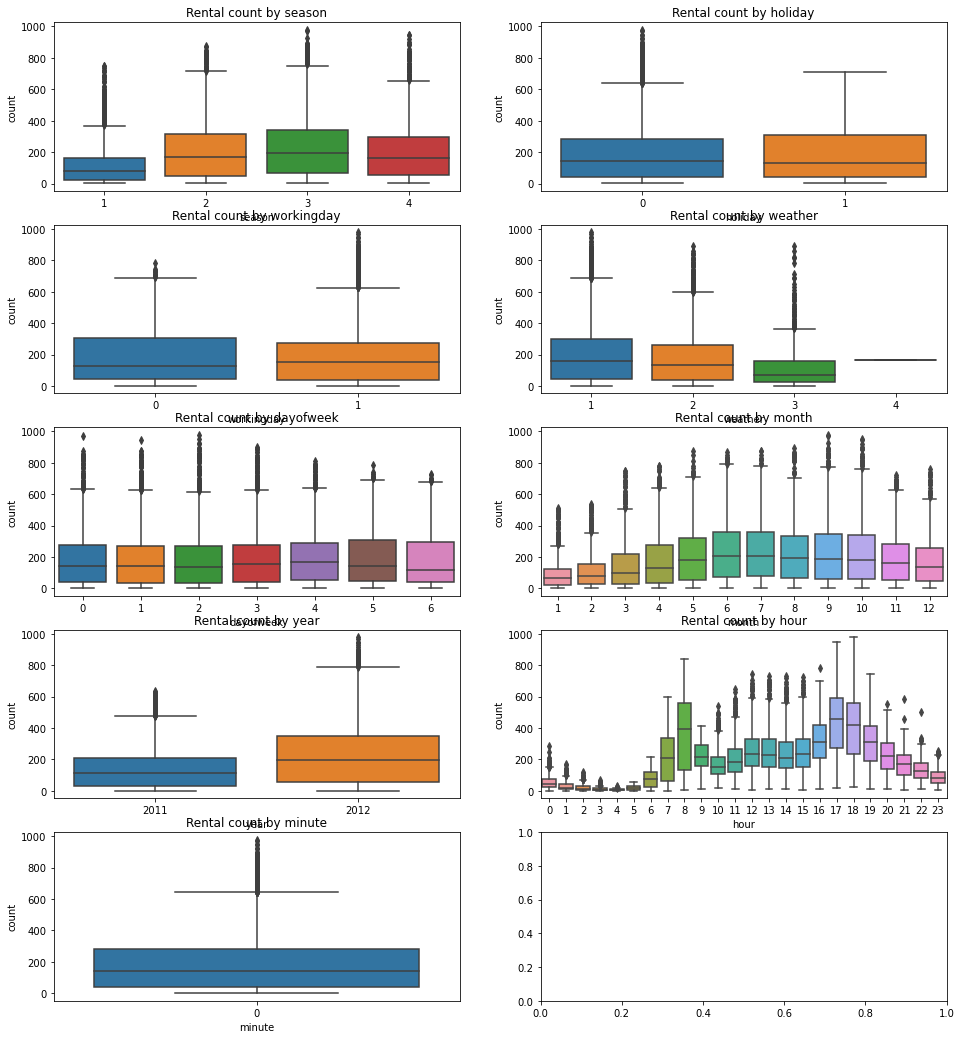

In [33]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize=(16, 18))


sns.boxplot(data = train, y="count", x = "season", orient = "v", ax = axes[0][0])
sns.boxplot(data = train, y="count", x = "holiday", orient = "v", ax = axes[0][1])
sns.boxplot(data = train, y="count", x = "workingday", orient = "v", ax = axes[1][0])
sns.boxplot(data = train, y="count", x = "weather", orient = "v", ax = axes[1][1])
sns.boxplot(data = train, y="count", x = "dayofweek", orient = "v", ax = axes[2][0])
sns.boxplot(data = train, y="count", x = "month", orient = "v", ax = axes[2][1])
sns.boxplot(data = train, y="count", x = "year", orient = "v", ax = axes[3][0])
sns.boxplot(data = train, y="count", x = "hour", orient = "v", ax = axes[3][1])
sns.boxplot(data = train, y="count", x = "minute", orient = "v", ax = axes[4][0])


axes[0][0].set(ylabel = "count", title = "Rental count by season")
axes[0][1].set(ylabel = "count", title = "Rental count by holiday")
axes[1][0].set(ylabel = "count", title = "Rental count by workingday")
axes[1][1].set(ylabel = "count", title = "Rental count by weather")
axes[2][0].set(ylabel = "count", title = "Rental count by dayofweek")
axes[2][1].set(ylabel = "count", title = "Rental count by month")
axes[3][0].set(ylabel = "count", title = "Rental count by year")
axes[3][1].set(ylabel = "count", title = "Rental count by hour")
axes[4][0].set(ylabel = "count", title = "Rental count by minute")

마지막 시각화의 의미는?

# PT 3

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.975198
Kurtosis: 0.247435


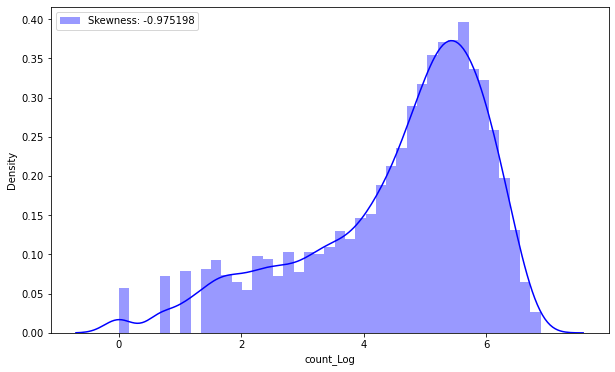

In [34]:
# 첨도 왜도가 1.2에 가까운 애들 log_scale로 정규화

train["count_Log"] = train["count"].map(lambda i:np.log(i) if i>0 else 0)

fig, ax = plt.subplots(1, 1, figsize = (10,6))


g = sns.distplot(train["count_Log"], color = "b", label="Skewness: {:2f}".format(train["count_Log"].skew()), ax=ax)
g = g.legend(loc = "best")

print("Skewness: %f" % train['count_Log'].skew())
print("Kurtosis: %f" % train['count_Log'].kurt())

train.drop('count', axis= 1, inplace=True)

Q. 로그 스케일을 써서 정규화 하는 목적은?

A. 

TODO : Casual이나 registered도 정규화를 해줘야한다.

### 풍속이 0이던것 해결

In [36]:
trainWind0    = train.loc[train["windspeed"] == 0]
trainWindNot0 = train.loc[train["windspeed"] != 0]

In [38]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    dataWind0 = data.loc[data["windspeed"] == 0]
    dataWindNot0 = data.loc[data["windspeed"] != 0]
    
    wcol = ["season", "weather", "humidity", "day", "temp", "atemp"] #독립변수, 
    
    #그런데 temp오 atemp는 다중공선성을 보이지 않았던가??
    
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
    
    rf_wind = RandomForestClassifier()
    rf_wind.fit(dataWindNot0[wcol], dataWindNot0["windspeed"]) 
    wind0 = rf_wind.predict(X=dataWind0[wcol])
    
    #코드의 가독성을 위해 일부러 이렇게 재정의했나?
    predictWind0    = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0["windspeed"] = wind0
    
    data = predictWindNot0.append(predictWind0)
    
    data["windspeed"] = data["windspeed"].astype("float")
    
    data.reset_index(inplace = True)
    data.drop("index", inplace = True, axis = 1)
    
    return data

C:\Users\user\AppData\Local\Temp\ipykernel_7540\2484144989.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
C:\Users\user\AppData\Local\Temp\ipykernel_7540\2484144989.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictWind0["windspeed"] = wind0
C:\Users\user\AppData\Local\Temp\ipykernel_7540\2484144989.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

<AxesSubplot:xlabel='windspeed', ylabel='count'>

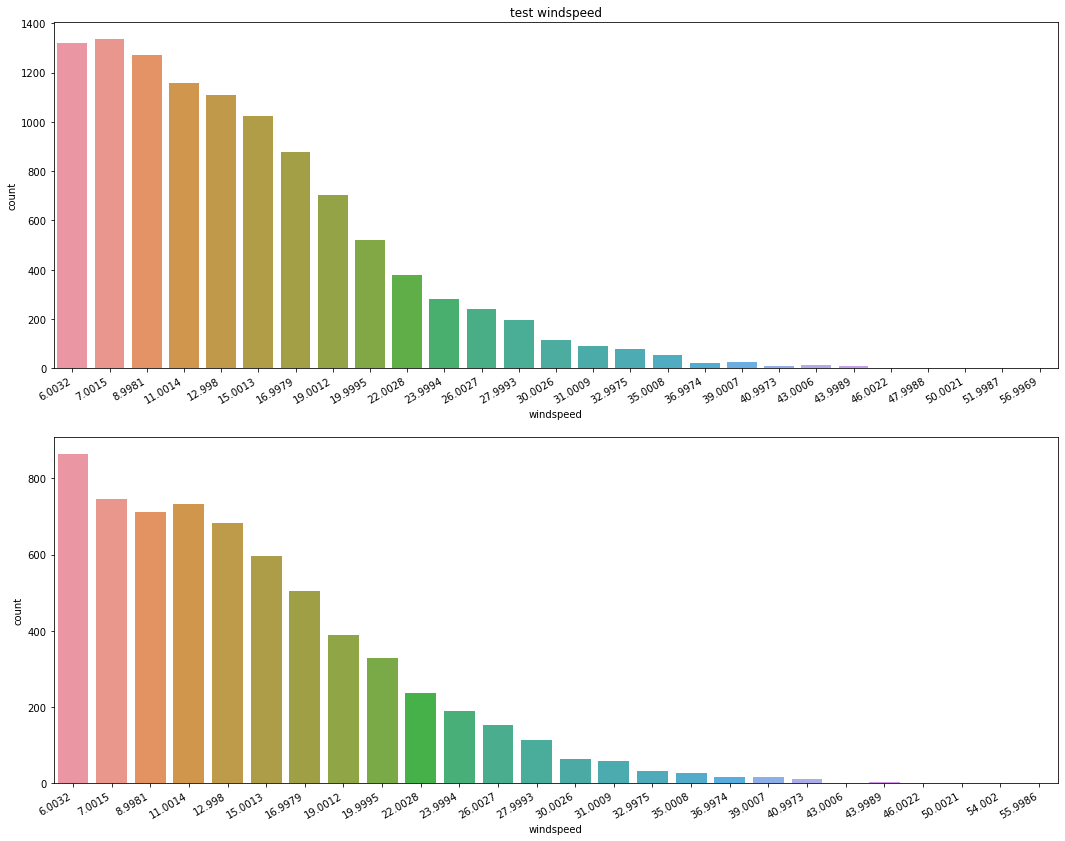

In [39]:
train = predict_windspeed(train)
test  = predict_windspeed(test)

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (18,14))

plt.sca(ax1)
plt.xticks(rotation = 30, ha = "right")
ax1.set(ylabel = "count", title = "train windspeed")
sns.countplot(data = train, x = "windspeed", ax = ax1)

plt.sca(ax2)
plt.xticks(rotation = 30, ha = "right")
ax1.set(ylabel = "count", title = "test windspeed")
sns.countplot(data = test, x = "windspeed", ax = ax2)

좀 더 자연스러운(?) 바람값이 나타나게 된다

In [40]:
corr_data = train[["count_Log", "windspeed"]]
corr_data.corr()

,count_Log,windspeed
count_Log,1.000000,0.126144
windspeed,0.126144,1.000000


0.1 에서 0.12로 미약하게 올랐다

# Categorical Feature 처리

In [41]:
train = pd.get_dummies(train, columns = ["weather"], prefix = "weather")
test  = pd.get_dummies(test, columns = ["weather"], prefix = "weather")

train = pd.get_dummies(train, columns = ["season"], prefix = "season")
test  = pd.get_dummies(test, columns = ["season"], prefix = "season")

In [42]:
datetime_test = test['datetime']

train.drop(["datetime", "registered","casual","holiday", "year_month", "minute", "second"], axis = 1, inplace = True)
test.drop(["datetime","holiday", "year_month", "minute", "second"], axis = 1, inplace = True)

# PT4

In [43]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train = train.drop('count_Log',axis = 1).values
target_label = train['count_Log'].values

x_test = test.values
x_train, x_valid, y_train, y_valid = train_test_split(x_train, target_label, test_size = 0.2, random_state = 2000)

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.05,
                                max_depth = 4, min_samples_leaf = 15,
                                min_samples_split = 10, random_state = 42)

GBR.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=4, min_samples_leaf=15,
                          min_samples_split=10, n_estimators=2000,
                          random_state=42)

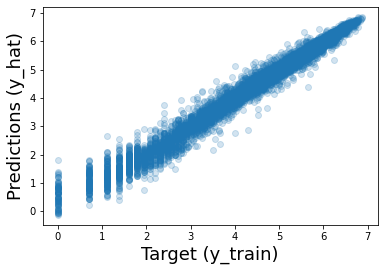

In [46]:
y_hat = GBR.predict(x_train)


plt.scatter(y_train, y_hat, alpha = 0.2)
plt.xlabel('Target (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.show()

해석법 : 여기서 scatter plot에서 나타내는 것은 0을 0으로 봤는지의 여부인 거신가? 그러면 0을 1.5로 본건 뭐란 말인가?

아 log_scale을 해서 이렇게 처리가 된건가?

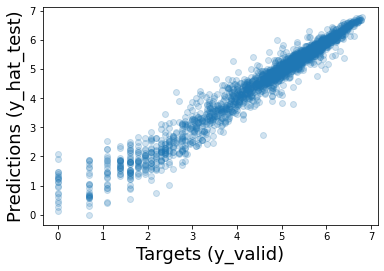

In [47]:
y_hat_test = GBR.predict(x_valid)

plt.scatter(y_valid, y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_valid)', size = 18)
plt.ylabel('Predictions (y_hat_test)', size = 18)
plt.show()

In [48]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#여러개 모델을 넣어서 다중으로 실험할 수 있다는건가?
models = [GradientBoostingRegressor()]
print(models)
model_names = ['regressor']
rmsle = []
d = {}

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train, y_train)
    test_pred = clf.predict(x_valid)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred, y_valid)))
    
d = {'Modeling Algo' : model_names, "RMSLE": rmsle}
d

[GradientBoostingRegressor()]


{'Modeling Algo': ['regressor'], 'RMSLE': [0.1292779541897446]}

In [51]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = GBR, X = x_train, y = y_train, cv = 8)

In [52]:
print(accuracies.mean())
print(accuracies.std())

0.9563230556980667
0.004195207374126334


In [54]:
use_logvals = 1

pred_gb = GBR.predict(x_test)

sub_gb = pd.DataFrame()
sub_gb['datetime'] = datetime_test
sub_gb['count'] = pred_gb
if use_logvals == 1:
    sub_gb['count'] = np.exp(sub_gb['count']) #여기서 로그값에 다시 exp를 취해서 원래의 값으로 복구시키는 작업을 꼭 해줘야한다.

sub_gb.to_csv('gb.csv',index=False)